<a href="https://colab.research.google.com/github/Shaniazhaf/kominfofgabatch2/blob/main/project%20capstone_shania%20zafira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eksplorasi dan Analisis Data Covid-19 di Jakarta Dengan Python 

---


data covid source by covid19.go.id

In [1]:
# Mengaktifkan library untuk mengakses API covid19.go.id
import requests
import numpy as np
import pandas as pd
import datetime, time
resp_jkt = requests.get('https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json?_=1665727203003', verify=False)

# Mengekstrak isi respon
cov_jkt_raw = resp_jkt.json()

# informasi umum kasus Covid-19 di Jakarta
print('Nama-nama elemen utama:/n',cov_jkt_raw.keys())
print('\nJumlah total kasus COVID-19 di Jakarta: %d'%cov_jkt_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jakarta: %f.2%%'%cov_jkt_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jakarta: %f.2%%'%cov_jkt_raw['sembuh_persen'])

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Nama-nama elemen utama:/n dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jakarta: 1425915
Persentase kematian akibat COVID-19 di Jakarta: 1.091159.2%
Persentase tingkat kesembuhan dari COVID-19 di Jakarta: 98.265745.2%


Informasi lengkap data covid-19 di Jakarta 2020-2022.

In [4]:
# Membaca data set ke dalam DataFrame, mencari informasi lebih lengkap yang terdapat pada list perkembangan
# Mengekstrak DataFrame menjadi cov_jkt
cov_jkt = pd.DataFrame(cov_jkt_raw['list_perkembangan'])
print('Info cov_jkt:\n', cov_jkt.info())
print('\nLima data teratas cov_jkt:\n', cov_jkt.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       944 non-null    int64
 1   KASUS                         944 non-null    int64
 2   MENINGGAL                     944 non-null    int64
 3   SEMBUH                        944 non-null    int64
 4   DIRAWAT_OR_ISOLASI            944 non-null    int64
 5   AKUMULASI_KASUS               944 non-null    int64
 6   AKUMULASI_SEMBUH              944 non-null    int64
 7   AKUMULASI_MENINGGAL           944 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  944 non-null    int64
dtypes: int64(9)
memory usage: 66.5 KB
Info cov_jkt:
 None

Lima data teratas cov_jkt:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583020800000      2          0       0                   2   
1  1583107200000      2          0       0       

In [17]:
# Mengubah tanggal dengan Datetime
cov_jkt_tidy= (cov_jkt.drop(columns=[item for item in cov_jkt.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jkt_tidy['tanggal'] = pd.to_datetime(cov_jkt_tidy['tanggal']*1e6, unit='ns')
print('Lima data terbawah:\n', cov_jkt_tidy.tail())

Lima data terbawah:
        tanggal  kasus_baru  meninggal  sembuh
939 2022-09-26         546          3     250
940 2022-09-27         740          0      15
941 2022-09-28         695          1      15
942 2022-09-29         781          2      39
943 2022-09-30         734          2      23


# Visualisasi data dalam grafik

Kelonjakkan kasus positif Covid-19 di Jakarta terjadi pada bulan Juli 2021- Agustus 2021 dan terjadi kembali kelonjakkan kasus positif Covid-19 (var. Omicron) pada bulan Februari 2022 - Maret 2022.

<Figure size 432x288 with 0 Axes>

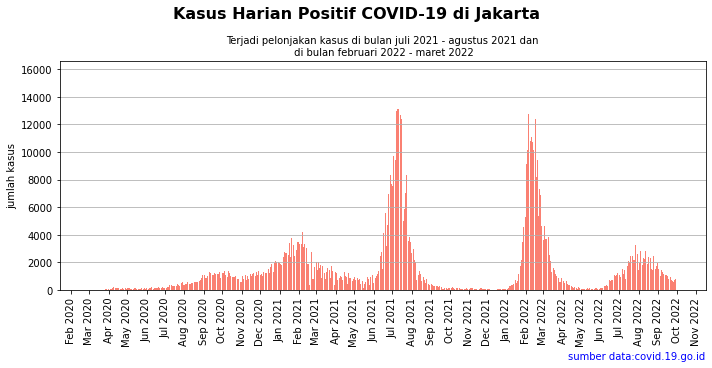

In [18]:
# Menampilkan grafik untuk mengekspresikan data
# memanggil library matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jkt_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jakarta', 
             y=1.05, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di bulan juli 2021 - agustus 2021 dan\n di bulan februari 2022 - maret 2022',
             fontsize=10, ha='center')
ax.set_xlabel('')
ax.set_ylabel('jumlah kasus')
ax.text(1, -0.3, 'sumber data:covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Data kasus sembuh dari Covid-19 di Jakarta tertinggi ada pada bulan Juli 2021 dan pertengahan bulan Februari 2022, kecepatan pemulihan dihubungkan dengan daya tahan tubuh orang yang terinfeksi karna saat ini cakupan imunisasi di seluruh dunia sudah cukup tinggi, lebih dari 50% (source by: herminahospitalarticles).

<Figure size 432x288 with 0 Axes>

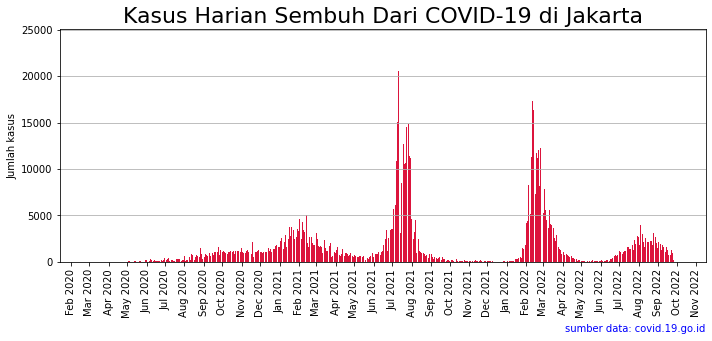

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jkt_tidy, x='tanggal', height='sembuh', color='crimson')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jakarta',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3,'sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Untuk data kasus meninggal dari Covid-19 di Jakarta, terjadi lonjakan pada pertengahan bulan Juli 2021 dan pada akhir bulan Februari 2022 menjadi data dengan jumlah meninggal tertinggi di 2022 namun lebih rendah dibandingkan data 2021. 

<Figure size 432x288 with 0 Axes>

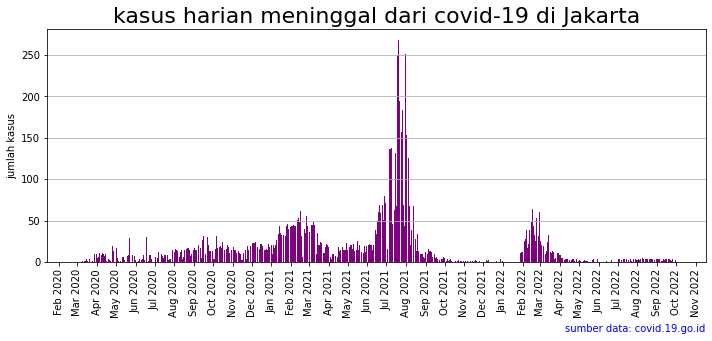

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jkt_tidy, x='tanggal', height='meninggal', color='purple')
ax.set_title('kasus harian meninggal dari covid-19 di Jakarta',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('jumlah kasus')
ax.text(1, -0.3, 'sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Setelah diamati, grafik perkembangan kasus mengalami fluktuasi pertambahan kasus harian. Untuk itu diamati pula perkembangan kasus dalam rentang waktu pekanan.

In [22]:
cov_jkt_pekanan= (cov_jkt_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jkt_pekanan['tahun'] = cov_jkt_pekanan['tanggal'].apply(lambda x: x.year)
cov_jkt_pekanan['pekan_ke'] =cov_jkt_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jkt_pekanan = cov_jkt_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jkt_pekanan:')
print(cov_jkt_pekanan.info())
print('\nLima data teratas cov_jkt_pekanan:\n', cov_jkt_pekanan.head())

Info cov_jkt_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     136 non-null    int64
 1   pekan_ke  136 non-null    int64
 2   jumlah    136 non-null    int64
dtypes: int64(3)
memory usage: 3.3 KB
None

Lima data teratas cov_jkt_pekanan:
    tahun  pekan_ke  jumlah
0   2020         9       2
1   2020        10       6
2   2020        11      16
3   2020        12      22
4   2020        13     248


Mencari tahu apakah pekan ini lebih baik dari pekan kemarin?, ternyata pekan ke-17 menjadi pekan yang baik walaupun pada pekan ke-18 kembali terjadi sedikit kenaikan jumlah positif Covid-19 di Jakarta.

In [23]:
cov_jkt_pekanan['jumlah_pekanlalu'] = cov_jkt_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jkt_pekanan ['lebih_baik'] = cov_jkt_pekanan['jumlah'] < cov_jkt_pekanan ['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jkt_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020         9       2                 0       False
1   2020        10       6                 2       False
2   2020        11      16                 6       False
3   2020        12      22                16       False
4   2020        13     248                22       False
5   2020        14     421               248       False
6   2020        15     933               421       False
7   2020        16     958               933       False
8   2020        17     749               958        True
9   2020        18     762               749       False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Menjawab pertanyaan: ":Apakah pekan ini lebih baik?".

<Figure size 432x288 with 0 Axes>

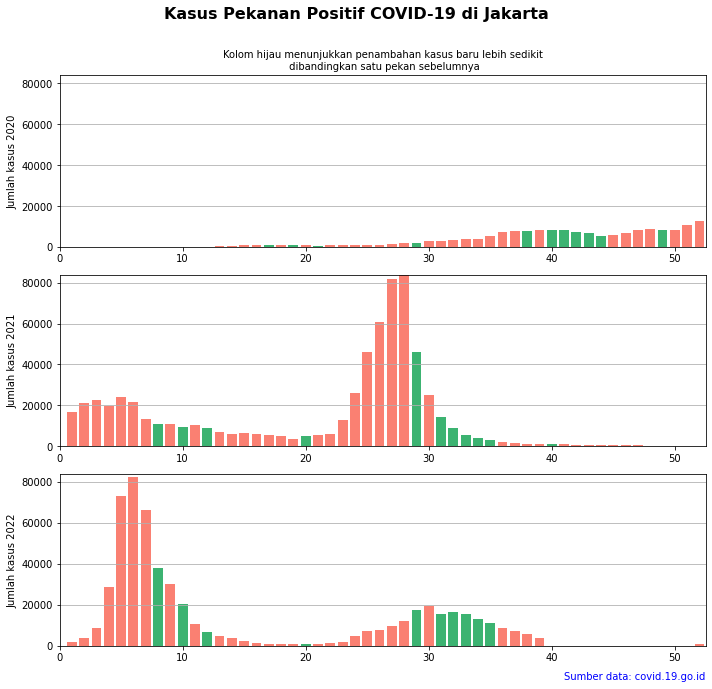

In [24]:
# membuat bar chart
plt.clf()  
jml_tahun_terjadi_covid19 = cov_jkt_pekanan['tahun'].nunique()  
tahun_terjadi_covid19 = cov_jkt_pekanan['tahun'].unique()  
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,   
       figsize=(10,3*jml_tahun_terjadi_covid19))  
  
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jakarta',  
   y=1.05, fontsize=16, fontweight='bold', ha='center')  
for i, ax in enumerate(axes):  
 ax.bar(data=cov_jkt_pekanan.loc[cov_jkt_pekanan['tahun']==tahun_terjadi_covid19[i]],  
    x='pekan_ke', height='jumlah',  
    color=['mediumseagreen' if x is True else 'salmon'  
    for x in cov_jkt_pekanan['lebih_baik']])  
 if i == 0:  
  ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit\n dibandingkan satu pekan sebelumnya',  
     fontsize=10)  
 elif i == jml_tahun_terjadi_covid19-1:  
  ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',  
      ha='right', transform=ax.transAxes)  
    
 ax.set_xlim([0, 52.5])  
 ax.set_ylim([0, max(cov_jkt_pekanan['jumlah'])])  
 ax.set_xlabel('')  
 ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))  
 ax.grid(axis='y')  
  
plt.tight_layout()  
plt.show()

Ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat Covid-19. Sementara itu penambahan kasus baru terus terjadi di masyarakat. Hal ini mungkin memicu pertanyaan lain di diri Anda: "Hingga saat ini ada berapa kasus yang masih aktif?"

Aktif dalam artian sedang dalam perawatan atau isolasi.

In [ ]:
cov_jkt_akumulasi = cov_jkt_tidy[['tanggal']].copy()
cov_jkt_akumulasi['akumulasi_aktif'] = (cov_jkt_tidy['kasus_baru'] - cov_jkt_tidy['sembuh'] - cov_jkt_tidy['meninggal']).cumsum()
cov_jkt_akumulasi['akumulasi_sembuh'] = cov_jkt_tidy['sembuh'].cumsum()
cov_jkt_akumulasi['akumulasi_meninggal'] = cov_jkt_tidy['meninggal'].cumsum()
print(cov_jkt_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
939 2022-09-26             6364           1401031                15533
940 2022-09-27             7089           1401046                15533
941 2022-09-28             7768           1401061                15534
942 2022-09-29             8508           1401100                15536
943 2022-09-30             9217           1401123                15538


Line Chart pola kasus aktif Covid-19 di Jakarta saat ini.

<Figure size 432x288 with 0 Axes>

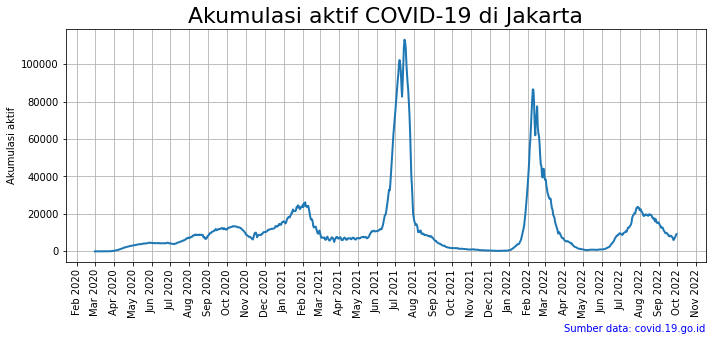

In [ ]:
# Membuat line chart
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jkt_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jakarta',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

Grafik komparasi antara akumulasi kasus aktif, kasus sembuh, dan kasus meninggal

---

Dapat dilihat pada grafik, akumulasi sembuh dari Covid-19 di Jakarta semakin meningkat dari tahun ke tahun.

<Figure size 432x288 with 0 Axes>

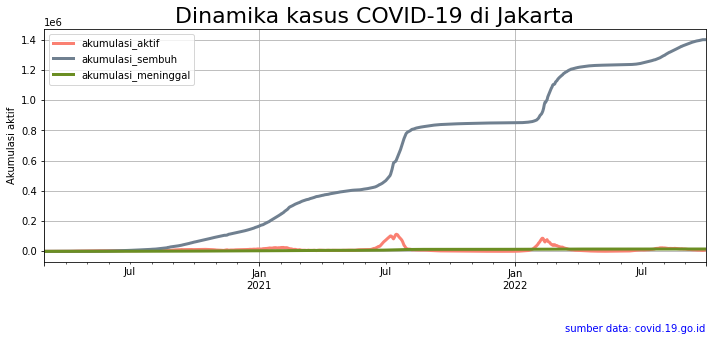

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jkt_akumulasi_ts= cov_jkt_akumulasi.set_index('tanggal') 
cov_jkt_akumulasi_ts.plot(kind='line', ax=ax, lw=3, 
							color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika kasus COVID-19 di Jakarta', 
			 fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()

Reference data

In [ ]:
#url_indo = 'https://data.covid19.go.id/public/api/update.json?_=1665726783937'
#url_prov = 'https://data.covid19.go.id/public/api/prov.json?_=1665726783940'
#url_kab = 'https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json?_=1665727203003'